In [1]:
#libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

['pulsar-stars']


DATA ANALYSIS

In [2]:
data=pd.read_csv("../input/pulsar-stars/pulsar_stars.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean_of_the_integrated_profile                17898 non-null  float64
 1   Standard_deviation_of_the_integrated_profile  17898 non-null  float64
 2   Excess_kurtosis_of_the_integrated_profile     17898 non-null  float64
 3   Skewness_of_the_integrated_profile            17898 non-null  float64
 4   Mean_of_the_DM_SNR_curve                      17898 non-null  float64
 5   Standard_deviation_of_the_DM_SNR_curve        17898 non-null  float64
 6    Excess_kurtosis_of_the_DM_SNR_curve          17898 non-null  float64
 7    Skewness_of_the_DM_SNR_curve                 17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
data = data.rename(columns={' Mean of the integrated profile':"mean_integrated_profile",
       ' Standard deviation of the integrated profile':"std_deviation_integrated_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_integrated_profile",
       ' Skewness of the integrated profile':"skewness_integrated_profile", 
        ' Mean of the DM-SNR curve':"mean_dm_snr_curve",
       ' Standard deviation of the DM-SNR curve':"std_deviation_dm_snr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dm_snr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dm_snr_curve",
       })

In [5]:
data.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


CORRELATIONS BETWEEN FEATURES

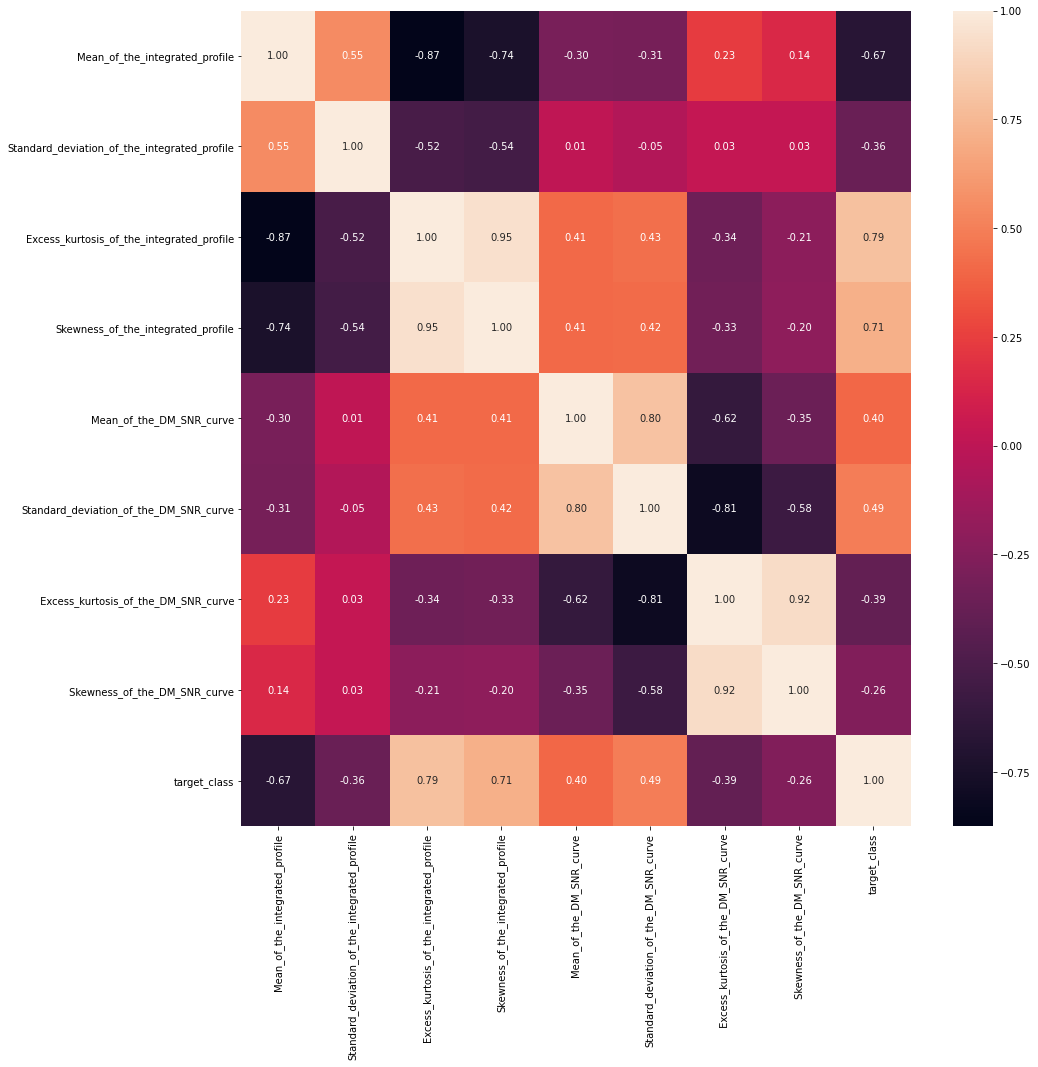

In [6]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor="blue",fmt=".2f",ax=ax)
plt.show()

CORRELATIONS BETWEEN FEATURES WITH CLASSES

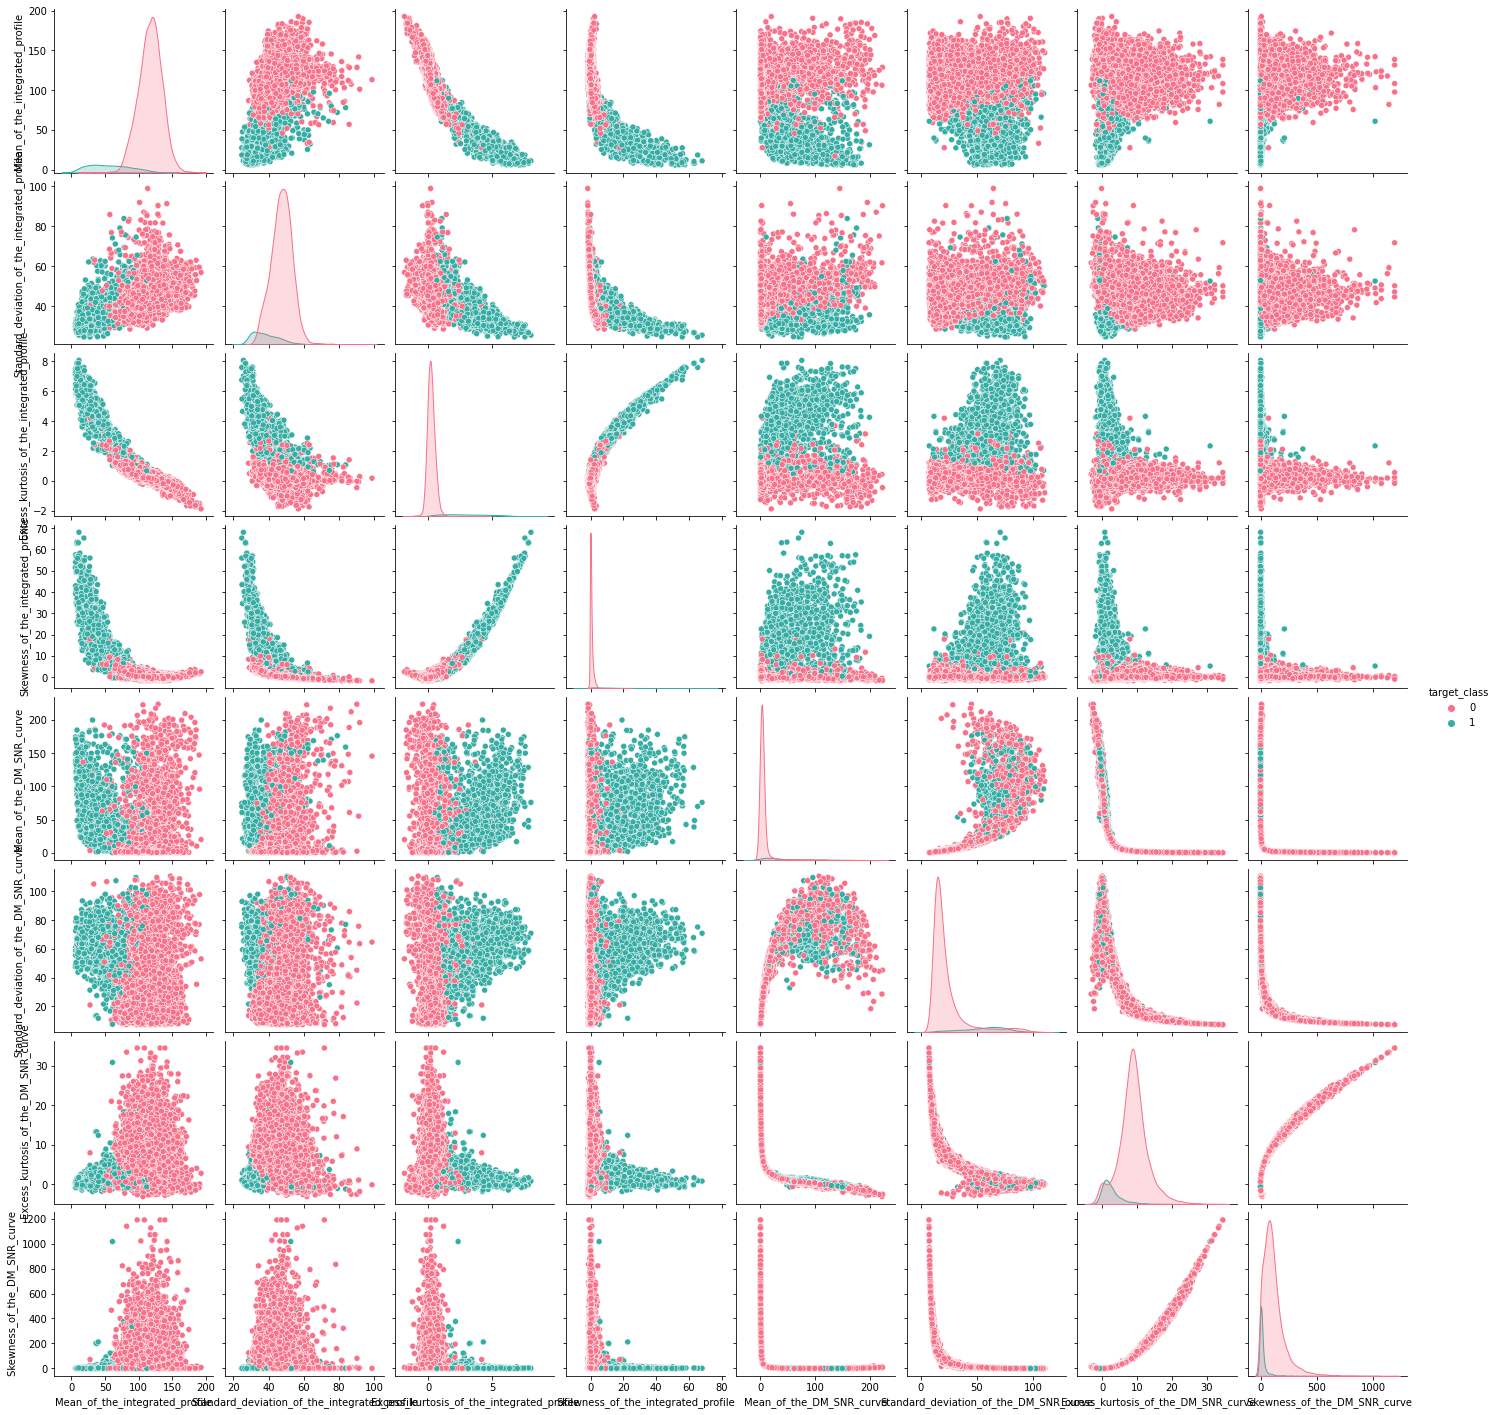

In [7]:
g = sns.pairplot(data,hue="target_class",palette="husl",diag_kind="kde",kind="scatter")

In [8]:
y = data["target_class"].values
x_data = data.drop(["target_class"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

LOGISTIC REGRESSION

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_prediction = lr.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error
mse_lr=mean_squared_error(y_test,lr_prediction)

from sklearn.metrics import confusion_matrix,classification_report
cm_lr=confusion_matrix(y_test,lr_prediction)
cm_lr=pd.DataFrame(cm_lr)
cm_lr["total"]=cm_lr[0]+cm_lr[1]
cr_lr=classification_report(y_test,lr_prediction)

In [12]:
from sklearn.metrics import cohen_kappa_score
cks_lr = cohen_kappa_score(y_test, lr_prediction)

In [13]:
score_and_mse={"model":["logistic regression"],"Score":[lr.score(x_test,y_test)],"Cohen Kappa Score":[cks_lr],"MSE":[mse_lr]}
score_and_mse=pd.DataFrame(score_and_mse)

K-NEAREST NEIGHBOUR (KNN) CLASSIFICATION

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =13) # n_neighbors = k
knn.fit(x_train,y_train)
knn_prediction = knn.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

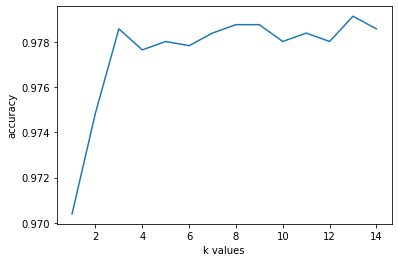

In [15]:
score_list = []
for each in range (1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show

In [16]:
mse_knn=mean_squared_error(y_test,knn_prediction)
cm_knn=confusion_matrix(y_test,knn_prediction)
cm_knn=pd.DataFrame(cm_knn)
cr_knn=classification_report(y_test,knn_prediction)
cm_knn["total"]=cm_knn[0]+cm_knn[1]

In [17]:
from sklearn.metrics import cohen_kappa_score
cks_knn= cohen_kappa_score(y_test, knn_prediction)

In [18]:
score_and_mse = score_and_mse.append({'model': "knn classification","Score":knn.score(x_test,y_test),"Cohen Kappa Score":cks_knn,"MSE":mse_knn}, ignore_index=True)

SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION

In [19]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
svm_prediction=svm.predict(x_test)

In [20]:
mse_svm=mean_squared_error(y_test,svm_prediction)
svm_cm=confusion_matrix(y_test,svm_prediction)
cm_svm=pd.DataFrame(svm_cm)
cm_svm["total"]=cm_svm[0]+cm_svm[1]

cr_svm=classification_report(y_test,svm_prediction)
cks_svm= cohen_kappa_score(y_test, svm_prediction)

In [21]:
score_and_mse = score_and_mse.append({'model': "svm classification","Score":svm.score(x_test,y_test),"Cohen Kappa Score":cks_svm,"MSE":mse_svm}, ignore_index=True)

NAIVE BAYES CLASSIFICATION

In [22]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
prediction_nb=nb.predict(x_test)

In [23]:
nb_mse=mean_squared_error(y_test,prediction_nb)
nb_cm=confusion_matrix(y_test,prediction_nb)
nb_cm=pd.DataFrame(nb_cm)
nb_cm["total"]=nb_cm[0]+nb_cm[1]

cr_nb=classification_report(y_test,prediction_nb)
cks_nb= cohen_kappa_score(y_test, prediction_nb)

In [24]:
score_and_mse = score_and_mse.append({'model': "naive bayes classification","Score":nb.score(x_test,y_test),"Cohen Kappa Score":cks_nb,"MSE":nb_mse}, ignore_index=True)

DECISION TREE CLASSIFICATION

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction_dt=dt.predict(x_test)

In [26]:
dt_mse=mean_squared_error(y_test,prediction_dt)
dt_cm=confusion_matrix(y_test,prediction_dt)
dt_cm=pd.DataFrame(dt_cm)
dt_cm["total"]=dt_cm[0]+dt_cm[1]

cr_dt=classification_report(y_test,prediction_dt)
cks_dt= cohen_kappa_score(y_test, prediction_dt)

In [27]:
score_and_mse = score_and_mse.append({'model': "decision tree classification","Score":dt.score(x_test,y_test),"Cohen Kappa Score":cks_dt, "MSE":dt_mse}, ignore_index=True)

RANDOM FOREST CLASSIFICATION

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

prediction_rf=rf.predict(x_test)

In [29]:
rf_mse=mean_squared_error(y_test,prediction_rf)
rf_cm=confusion_matrix(y_test,prediction_rf)
rf_cm=pd.DataFrame(rf_cm)
rf_cm["total"]=rf_cm[0]+rf_cm[1]

cr_rf=classification_report(y_test,prediction_rf)
cks_rf= cohen_kappa_score(y_test, prediction_rf)

In [30]:
score_and_mse = score_and_mse.append({'model': "random forest classification","Score":rf.score(x_test,y_test),"Cohen Kappa Score":cks_rf,"MSE":rf_mse}, ignore_index=True)

EVALUATING CLASSIFICATION MODEL

**Classification report**

In [31]:
print('Classification report for Logistic Regression: \n',cr_lr)
print('Classification report for KNN Classification: \n',cr_knn)
print('Classification report for SVM Classification: \n',cr_svm)
print('Classification report for Naive Bayes Classification: \n',cr_nb)
print('Classification report for Decision Tree Classification: \n',cr_dt)
print('Classification report for Random Forest Classification: \n',cr_rf)

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.94      0.77      0.84       490

    accuracy                           0.97      5370
   macro avg       0.96      0.88      0.91      5370
weighted avg       0.97      0.97      0.97      5370

Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.93      0.83      0.88       490

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Classification report for SVM Classification: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4880
           1       0.95      0.81      0.88       490

    accuracy                         

**Confusion Matrix**

Text(0.5, 1.0, 'Random Forest Classification')

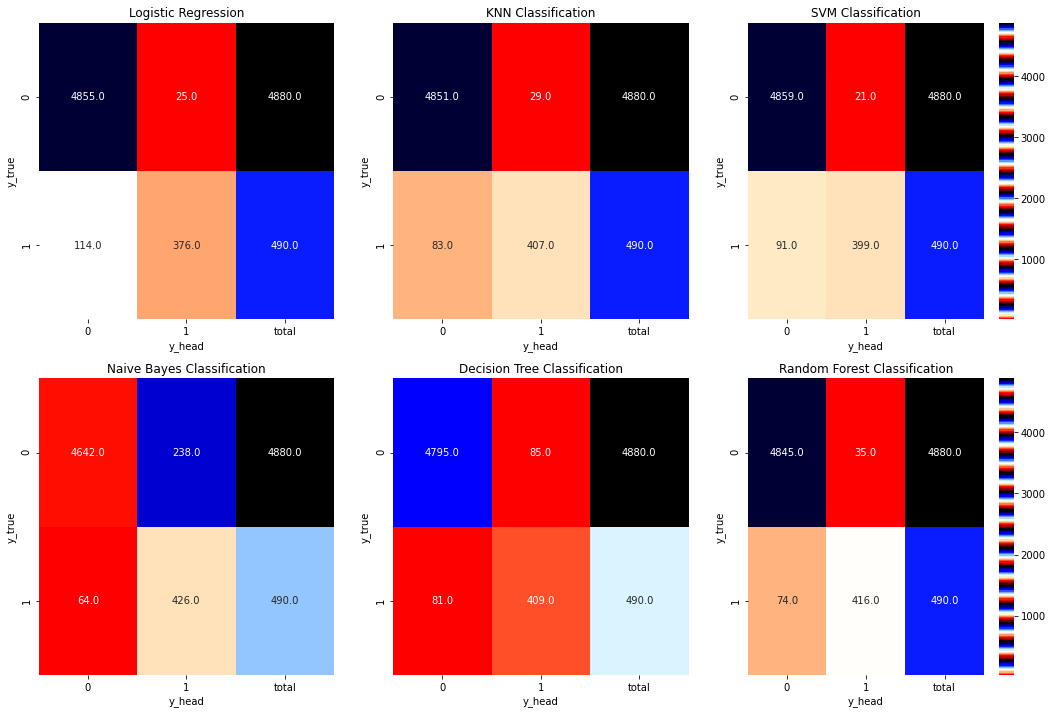

In [32]:
f, axes = plt.subplots(2, 3,figsize=(18,12))
g1 = sns.heatmap(cm_lr,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[0,0])
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')
g1.set_title("Logistic Regression")
g2 = sns.heatmap(cm_knn,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[0,1])
g2.set_ylabel('y_true')
g2.set_xlabel('y_head')
g2.set_title("KNN Classification")
g3 = sns.heatmap(cm_svm,annot=True,fmt=".1f",cmap="flag",ax=axes[0,2])
g3.set_ylabel('y_true')
g3.set_xlabel('y_head')
g3.set_title("SVM Classification")
g4 = sns.heatmap(nb_cm,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[1,0])
g4.set_ylabel('y_true')
g4.set_xlabel('y_head')
g4.set_title("Naive Bayes Classification")
g5 = sns.heatmap(dt_cm,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[1,1])
g5.set_ylabel('y_true')
g5.set_xlabel('y_head')
g5.set_title("Decision Tree Classification")
g6 = sns.heatmap(rf_cm,annot=True,fmt=".1f",cmap="flag",ax=axes[1,2])
g6.set_ylabel('y_true')
g6.set_xlabel('y_head')
g6.set_title("Random Forest Classification")

In [33]:
score_and_mse

,model,Score,Cohen Kappa Score,MSE
0,logistic regression,0.974115,0.830036,0.025885
1,knn classification,0.979143,0.867680,0.020857
2,svm classification,0.979143,0.865603,0.020857
3,naive bayes classification,0.943762,0.707598,0.056238
4,decision tree classification,0.969088,0.814286,0.030912
5,random forest classification,0.979702,0.873063,0.020298
